<a href="https://colab.research.google.com/github/shauryanegi/Data-Analysis/blob/master/End_to_End_heart_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting heart disease using machine learning**

The notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.


**We are going to take the following approach:**

1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

#1. Problem Definition

In a statement, given clinical parameters about a patient, can we predict whether a patient has heart disease or not?

#2 Data
The original data came from Cleavland data from the UCI ML Repository.
https://archive.ics.uci.edu/ml/datasets/heart+disease

There is also a version available on Kaggle.
https://www.kaggle.com/ronitf/heart-disease-uci

#3 Evaluation
If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

#4. Features

A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a subject matter expert (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

age - age in years

sex - (1 = male; 0 = female)

cp - chest pain type

0: Typical angina: chest pain related decrease 
blood supply to the heart

1: Atypical angina: chest pain not related to heart

2: Non-anginal pain: typically esophageal spasms (non heart related)

3: Asymptomatic: chest pain not showing signs of disease

trestbps - resting blood pressure (in mm Hg on admission to the hospital)

anything above 130-140 is typically cause for concern

chol - serum cholestoral in mg/dl

serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes

restecg - resting electrocardiographic results
0: Nothing to note
1: ST-T Wave abnormality
can range from mild symptoms to severe problems
signals non-normal heart beat
2: Possible or definite left ventricular hypertrophy
Enlarged heart's main pumping chamber

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest
looks at stress of heart during excercise
unhealthy heart will stress more

slope - the slope of the peak exercise ST segment
0: Upsloping: better heart rate with excercise (uncommon)
1: Flatsloping: minimal change (typical healthy heart)
2: Downslopins: signs of unhealthy heart

ca - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)

thal - thalium stress result
1,3: normal
6: fixed defect: used to be defect but ok now
7: reversable defect: no proper blood movement when excercising

target - have disease or not (1=yes, 0=no) (= the predicted attribute)

Note: No personal identifiable information (PPI) can be found in the dataset.

## Preparing the tools

We are going to use pandas,matplotlib and NumPy for data analysis and manipulation

In [139]:
# Import all the tools we need

# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#We want our plots to appear inside the notebook
%matplotlib inline 

#Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load the Dataset

In [140]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [141]:
df = pd.read_csv("heart-disease.csv")

In [142]:
df.head()
df.shape #(rows,columns)

(303, 14)

##Data Exploration( Exploratory data analysis or EDA)
The goal is know more about the data and become a SME on the dataset you are working on.

1. What questions are we trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal wirh it?
4. What are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [143]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [144]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [146]:
#Let's find out how many type of classes are
df["target"].value_counts() #The labels are balanced

1    165
0    138
Name: target, dtype: int64

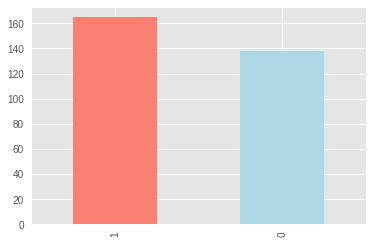

In [147]:
df["target"].value_counts().plot(kind = 'bar', color = ['salmon','lightblue']);

In [148]:
#Are there any missing values?
df.isna().sum() #No null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [149]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [150]:
### Heart Disease Frequency according to Sex
df["sex"].value_counts() #More males than females as we can see from the data dictionary

1    207
0     96
Name: sex, dtype: int64

In [151]:
#Compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


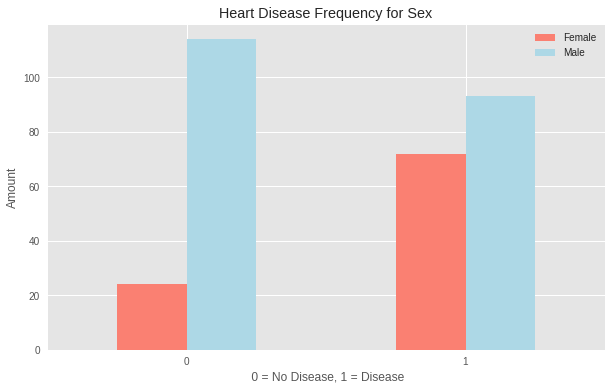

In [152]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

            # Create a plot of crosstab

pd.crosstab(df.target, df.sex).plot(kind='bar', figsize=(10, 6),
                                    color=['salmon', 'lightblue'])
plt.style.use('ggplot')
plt.title('Heart Disease Frequency for Sex')
plt.xlabel(' 0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0);

In [153]:
df["thalach"].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

# Age vs Max Heart Rate for Heart Disease

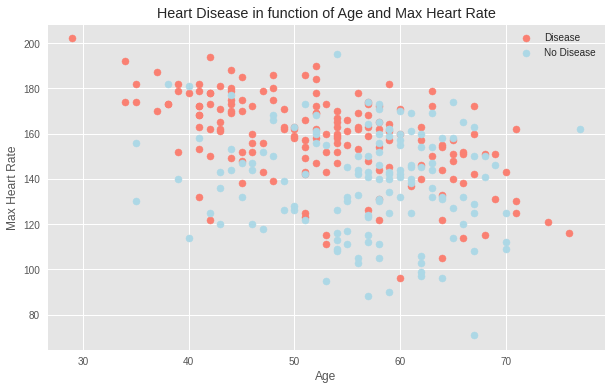

In [154]:
# Create another figure

plt.figure(figsize=(10, 6))

# Scatter with positive examples

plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1],
            c='salmon')

# Scatter with negative examples

plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0],
            c='lightblue')

# Add some helpful information

plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease'])

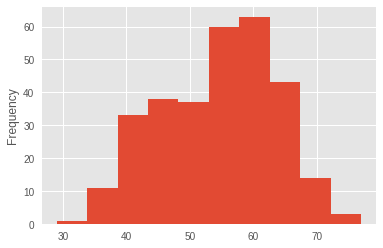

In [155]:
#Check the distribution of the age column with a histogram
df.age.plot.hist(); #Best way to identify outliers

## **Heart Disease Frequency per Chest Pain**

cp - chest pain type

0: Typical angina: chest pain related decrease 
blood supply to the heart

1: Atypical angina: chest pain not related to heart

2: Non-anginal pain: typically esophageal spasms (non heart related)

3: Asymptomatic: chest pain not showing signs of disease


In [156]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

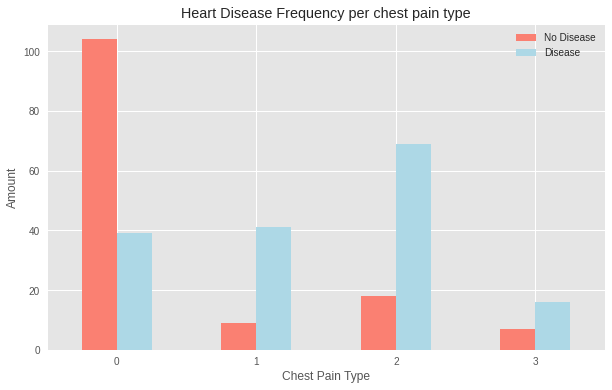

In [157]:
# Make the crosstab more visual

pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(10, 6),
                                   color=['salmon', 'lightblue'])

plt.title('Heart Disease Frequency per chest pain type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0)

In [158]:
#Building a Correlation Matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


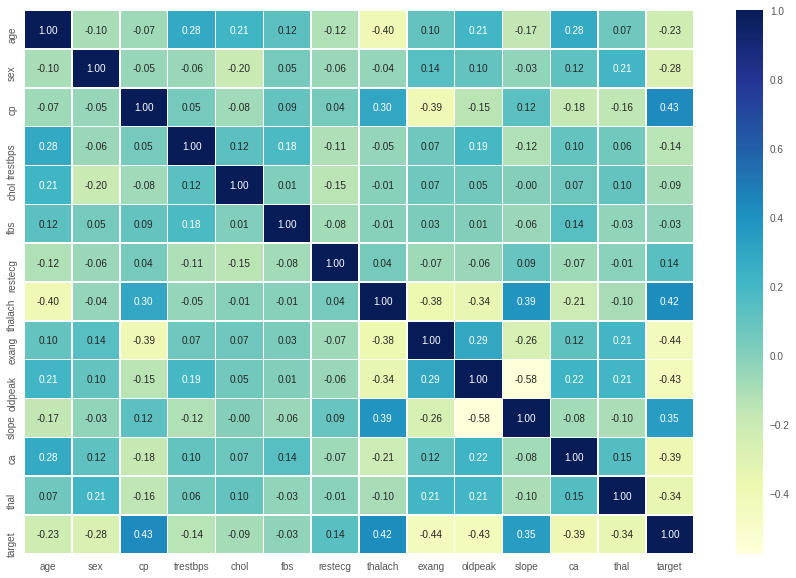

In [159]:
# Let us make our correlation matrix

corr_matrix = df.corr()
(fig, ax) = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, cmap='YlGnBu', annot=True,
                 linewidths=0.5, fmt='.2f')


Much better. A higher positive value means a potential positive correlation (increase) and a higher negative value means a potential negative correlation (decrease).

## Importing D-tale library for automatic EDA

In [160]:
!pip install dtale
import dtale

In [161]:
d = dtale.show(df)

# **Preparing and modelling our data for Machine Learning**

In [162]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [163]:
X = df.drop(['target'], axis=1)
y = df['target']

# Split data into train and test sets

np.random.seed(42)

(X_train, X_test, y_train, y_test) = train_test_split(X, y,
        test_size=0.2)

			

In [164]:
#Checking if all of our data has same amount of rows and columns
print(len(X_train)), print(len(y_train)), print(len(X_test)), print(len(y_test))

242
242
61
61


(None, None, None, None)

### Now we have got our data split into training and test sets, it is time to train the model.

We are going to try 3 different machine learning models.

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [165]:
# Put models in a dictionary

models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}


# Create a function to fit and score the models

def fit_and_score(
    models,
    X_train,
    X_test,
    y_train,
    y_test,
    ):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_train : Training data (no labels)
    X_test: testing data (no labels)
    y_train : training labels
    y_test : test labels
    """

    # Set random seed

    np.random.seed(42)

    # Make a dictionary to keep model scores

    model_scores = {}

    # Loop through models

    for (name, model) in models.items():

      # Fit the model to the data

        model.fit(X_train, y_train)

      # Evaulaute the model and append the score to the model score

        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [166]:
model_scores = fit_and_score(models=models, X_train=X_train,
                             X_test=X_test, y_train=y_train,
                             y_test=y_test)
model_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

## Model Comparison

(array([0]), <a list of 1 Text major ticklabel objects>)

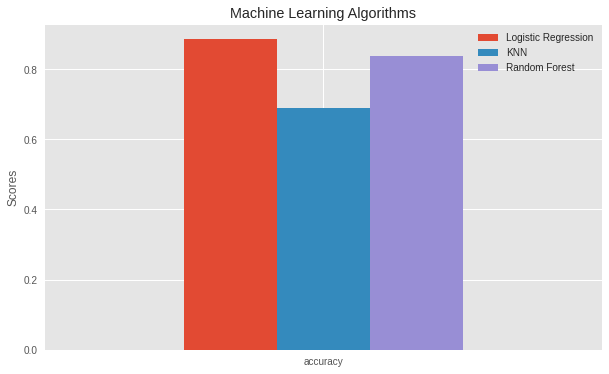

In [167]:
model_compare = pd.DataFrame(model_scores, index = ['accuracy'])
model_compare.plot.bar(linewidth = 20, figsize = (10,6));
plt.title("Machine Learning Algorithms")
plt.ylabel("Scores")
plt.xticks(rotation = 0)

Now we got a baseline model and we know that our first model might not be the best perfoming model. We have to work on hyperparameter tuning.

Let's look at the following:
*Hyperparamter tuning

*Feature importance

*Confusion matrix

*Cross-validation

*Precision

*Recall

*F1-Score

*Classification report

*ROC Curve

*Area under the curve (AUC)

**Hyperparameter tuning (by hand manually)**

In [168]:
#Let us tune KNN

train_scores = []
test_scores = []

#Create a list of values for N-Neighbors
neighbors = range(1,21)

#Setup KNN instance
knn = KNeighborsClassifier()

#Loop through different n_neighbors
for i in neighbors:
  knn.set_params(n_neighbors = i)

  #Fit the algorithm
  knn.fit(X_train, y_train)

  #Update training scores list
  train_scores.append(knn.score(X_train,y_train))

  #Update the test scores list
  test_scores.append(knn.score(X_test,y_test))


Maximum KNN score on test data: 75.41%


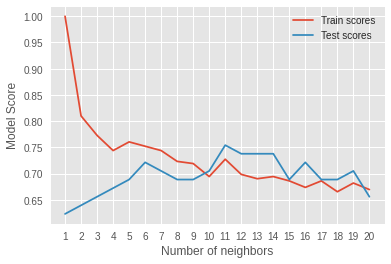

In [171]:
plt.plot(neighbors, train_scores, label = "Train scores")
plt.plot(neighbors, test_scores, label = "Test scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on test data: {max(test_scores) * 100:.2f}%")

# **Hyperparamater tuning with RandomizedSearchCV**

We are going to tune:
* LogisticRegression()
* RandomForestClassifier()

  ...using RandomizedSearchCV

In [173]:
#Create a hyperparameter grid for Logistic Regression

log_reg_grid = {"C": np.logspace(-4,4,20),
                "penalty": ["l2", "elasticnet"],
                "solver": ["liblinear"]}


#Create a hyperparameter grid for Random Forest Classifier
rf_grid = {"rf_grid_estimators": np.arange(10,1000,50),
           "max_depth" : [None,3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "max_features" : ["auto", "sqrt"]
           }


Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV

In [175]:
#Tune Logistic Regression

np.random.seed(42)

#Setup random hyperparameter search for Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv = 14,
                                n_iter = 20,
                                verbose = True)

#Fit random hyperparameter search model for Logistic Regression
rs_log_reg.fit(X_train,y_train)

Fitting 14 folds for each of 20 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.


/usr/local/lib/python3.7/

RandomizedSearchCV(cv=14, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C'...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [176]:
#Tune Random Forest Classification
np.random.seed(42)

#Setup random hyperparameter search for Logistic Regression
rs_rf_reg = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions = rf_grid,
                                cv = 14,
                                n_iter = 20,
                                verbose = True)

#Fit random hyperparameter search model for Logistic Regression
rs_rf_reg.fit(X_train,y_train)

Fitting 14 folds for each of 20 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:  2.8min finished


RandomizedSearchCV(cv=14, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [179]:
print(rs_log_reg.best_params_)
print(rs_rf_reg.best_params_)

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.23357214690901212}
{'n_estimators': 410, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 3}


In [180]:
print(rs_log_reg.score(X_test,y_test))
print(rs_rf_reg.score(X_test,y_test))

0.8852459016393442
0.8688524590163934


In [181]:
model_scores

{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

1. Hyperparameter tuning using hand
2. Hyperparameter tuning using GridSearch and RandomizedSearch CV

In [183]:
## Hyperparameter tuning with GridSearchCV
#Since our LogisticRegression model provides the best scores so far, we would try to improve them again using GridSearchCV

In [188]:
#Different hyperparameters for our LogisticRegression model

log_reg_grid = {"C": np.logspace(-4,4,30),
                "penalty": ["l2", "elasticnet"],
                "solver": ["liblinear","lbfgs"]}

#Setup random hyperparameter search for Logistic Regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                                param_grid = log_reg_grid,
                                cv = 14,
                                verbose = False)

#Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning

In [189]:
#Check the best parameters
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'penalty': 'l2', 'solver': 'liblinear'}

In [190]:
print(gs_log_reg.score(X_test,y_test))

0.8852459016393442


## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
*Confusion matrix
*Classification report
*Precision
*Recall
*F1-score

...and it would be great if cross-validation was used where possible.

In [192]:
#Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [193]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

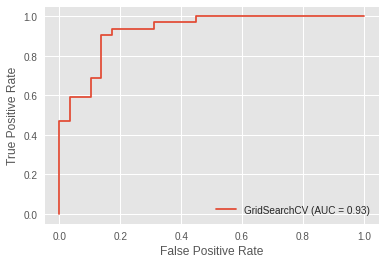

In [194]:
#Import ROC curve function from the sklearn.metrics module.
# Plot ROC curve and calculate and calculate AUC metric

plot_roc_curve(gs_log_reg, X_test, y_test)

In [198]:
#Confusion Matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


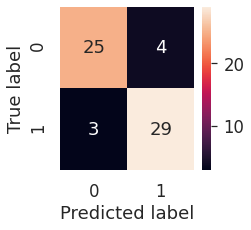

In [210]:
# Import Seaborn

import seaborn as sns
sns.set(font_scale=1.5)  # Increase font size


def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """

    (fig, ax) = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True,
                     cbar=True)  # Annotate the boxes
    plt.xlabel('Predicted label')  # predictions go on the x-axis
    plt.ylabel('True label')  # true labels go on the y-axis


plot_conf_mat(y_test, y_preds)

Now we have got a ROC curve, an AUC metric and a confusion matrix, let us get a classificatom report as well as cross-validated precision,recall and f1-score.

In [211]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation metrics using cross validation. Using cross_val_score

In [212]:
#Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'penalty': 'l2', 'solver': 'liblinear'}

In [213]:
#Create a new classifier with best hyperparameters
clf = LogisticRegression(C =0.1082636733874054, penalty = 'l2',
                         solver = 'liblinear')

In [215]:
#Cross validated accuracy
cv_acc = cross_val_score(clf,X,y, cv = 14, scoring = "accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.840599876314162

In [216]:
#Cross validated precision
cv_precision = cross_val_score(clf,X,y, cv = 14, scoring = "precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8160125588697016

In [217]:
#Cross validated recall
cv_recall = cross_val_score(clf,X,y, cv = 14, scoring = "recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9193722943722943

In [218]:
#Cross validated f1
cv_f1 = cross_val_score(clf,X,y, cv = 14, scoring = "f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.862605017480794

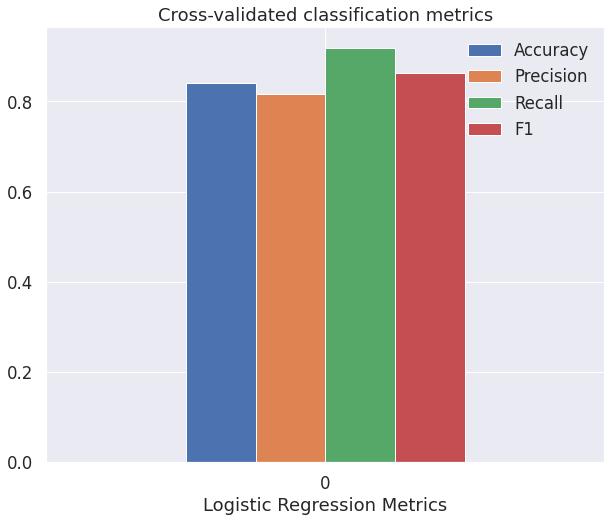

In [233]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])

cv_metrics.plot.bar(title = 'Cross-validated classification metrics', legend = True, figsize = (10,8))
plt.xlabel("Logistic Regression Metrics")
plt.xticks(rotation = 0);

## Feature Importance

Feature importance is a way of asking which features contributed most to the outcomes of the model and how did they contribute.

Finding Feature Importance is different for each Machine Learning model.

Let's find the feature importance for our Logistic Regresison.

In [234]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [237]:
# Fit an instance of Logistic Regression

gs_log_reg.best_params_
clf = LogisticRegression(C=0.1082636733874054, penalty='l2',
                         solver='liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=0.1082636733874054, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [238]:
#Check coef_ (Feature Importance)
clf.coef_

array([[ 6.05000871e-05, -6.48812516e-01,  5.86851379e-01,
        -1.15577165e-02, -1.50181906e-03,  2.45434729e-02,
         2.20601838e-01,  2.39710262e-02, -4.71371751e-01,
        -5.24222207e-01,  3.53142990e-01, -5.57092301e-01,
        -5.64594843e-01]])

In [240]:
#Match the coef of features to the columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 6.050008712704012e-05,
 'ca': -0.5570923005318527,
 'chol': -0.0015018190618504858,
 'cp': 0.5868513791226628,
 'exang': -0.47137175068316706,
 'fbs': 0.024543472852260224,
 'oldpeak': -0.5242222072262522,
 'restecg': 0.22060183797812405,
 'sex': -0.6488125156676056,
 'slope': 0.35314299039813973,
 'thal': -0.5645948425160071,
 'thalach': 0.023971026179066112,
 'trestbps': -0.01155771651409749}

In [248]:
#Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index = [0])

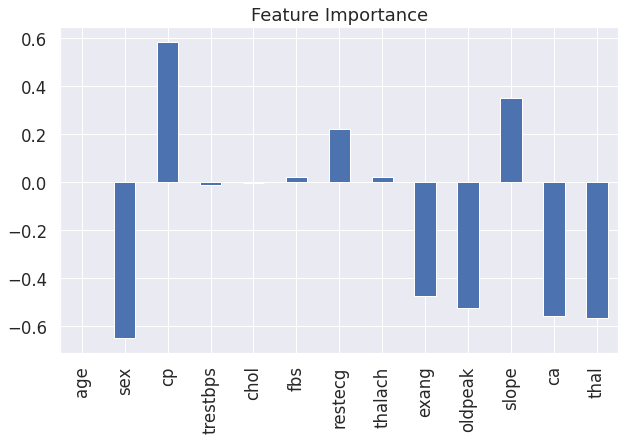

In [254]:
feature_df.T.plot.bar(title = 'Feature Importance', legend = False, figsize = (10,6))

You'll notice some are negative and some are positive.

The larger the value (bigger bar), the more the feature contributes to the models decision.

If the value is negative, it means there's a negative correlation. And vice versa for positive values.

For example, the sex attribute has a negative value of -0.904, which means as the value for sex increases, the target value decreases.

We can see this by comparing the sex column to the target column.

In [258]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


You can see, when sex is 0 (female), there are almost 3 times as many (72 vs. 24) people with heart disease (target = 1) than without.

And then as sex increases to 1 (male), the ratio goes down to almost 1 to 1 (114 vs. 93) of people who have heart disease and who don't.

What does this mean?

It means the model has found a pattern which reflects the data. Looking at these figures and this specific dataset, it seems if the patient is female, they're more likely to have heart disease.

How about a positive correlation?

In [259]:
# Contrast slope (positive coefficient) with target
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


Looking back the data dictionary, we see slope is the "slope of the peak exercise ST segment" where:

0: Upsloping: better heart rate with excercise (uncommon)
1: Flatsloping: minimal change (typical healthy heart)
2: Downslopins: signs of unhealthy heart
According to the model, there's a positive correlation of 0.470, not as strong as sex and target but still more than 0.

This positive correlation means our model is picking up the pattern that as slope increases, so does the target value.

Is this true?

When you look at the contrast (pd.crosstab(df["slope"], df["target"]) it is. As slope goes up, so does target.

What can you do with this information?

This is something you might want to talk to a subject matter expert about. They may be interested in seeing where machine learning model is finding the most patterns (highest correlation) as well as where it's not (lowest correlation).

Doing this has a few benefits:

Finding out more - If some of the correlations and feature importances are confusing, a subject matter expert may be able to shed some light on the situation and help you figure out more.

Redirecting efforts - If some features offer far more value than others, this may change how you collect data for different problems. See point 

3.Less but better - Similar to above, if some features are offering far more value than others, you could reduce the number of features your model tries to find patterns in as well as improve the ones which offer the most. This could potentially lead to saving on computation, by having a model find patterns across less features, whilst still achieving the same performance levels.

#**Experimentation**
Well we've completed all the metrics your boss requested. You should be able to put together a great report containing a confusion matrix, a handful of cross-valdated metrics such as precision, recall and F1 as well as which features contribute most to the model making a decision.

But after all this you might be wondering where step 6 in the framework is, experimentation.

Well the secret here is, as you might've guessed, the whole thing is experimentation.

From trying different models, to tuning different models to figuring out which hyperparameters were best.

What we've worked through so far has been a series of experiments.

And the truth is, we could keep going. But of course, things can't go on forever.

So by this stage, after trying a few different things, we'd ask ourselves did we meet the evaluation metric?

Remember we defined one in step 3.

If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

In this case, we didn't. The highest accuracy our model achieved was below 90%.

What next?
You might be wondering, what happens when the evaluation metric doesn't get hit?

Is everything we've done wasted?

No.

It means we know what doesn't work. In this case, we know the current model we're using (a tuned version of LogisticRegression) along with our specific data set doesn't hit the target we set ourselves.

This is where step 6 comes into its own.

A good next step would be to discuss with your team or research on your own different options of going forward.

Could you collect more data?

Could you try a better model? If you're working with structured data, you might want to look into CatBoost or XGBoost.

Could you improve the current models (beyond what we've done so far)?

If your model is good enough, how would you export it and share it with others? (Hint: check out Scikit-Learn's documentation on model persistance)
The key here is to remember, your biggest restriction will be time. Hence, why it's paramount to minimise your times between experiments.

The more you try, the more you figure out what doesn't work, the more you'll start to get a hang of what does.